In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv('../data/Titanic/train.csv')
test_df = pd.read_csv('../data/Titanic/test.csv')

In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Note:
* SibSp: Siblings / Spouses
* Parch : Parent / Children
* Ticket : Ticket Number
* Cabin : Cabin Number

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* Categorical : Survived, Sex, Embarked, Pclass (ordinal), SibSp, Parch
    * Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* Numericals: Age, Fare
* Mix type of data: Ticket, Cabin
* Contain Error/Typo: Name
* Blank or Null: Cabin > Age > Embarked

In [10]:
train_df['Survived'] = train_df['Survived'].astype('category')

In [11]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
def convert (df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')

convert(train_df, features)
convert(test_df, features)  

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(6), float64(2), int64(1), object(3)
memory usage: 48.3+ KB


# Exploratory Data Analysis (EDA)


### 1. EDA For Categorical Features

In [13]:
train_df['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [14]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


<Axes: xlabel='Sex', ylabel='count'>

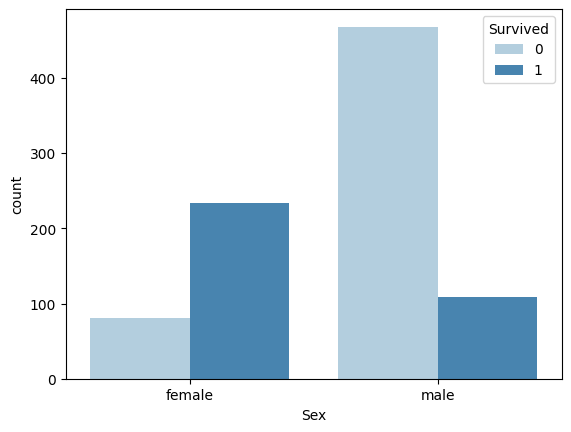

In [15]:
sns.countplot(x='Sex', data=train_df, hue='Survived', palette='Blues')

* Biểu đồ trên cho thấy nữ giới có tỉ lệ sống sót cao hơn nam giới

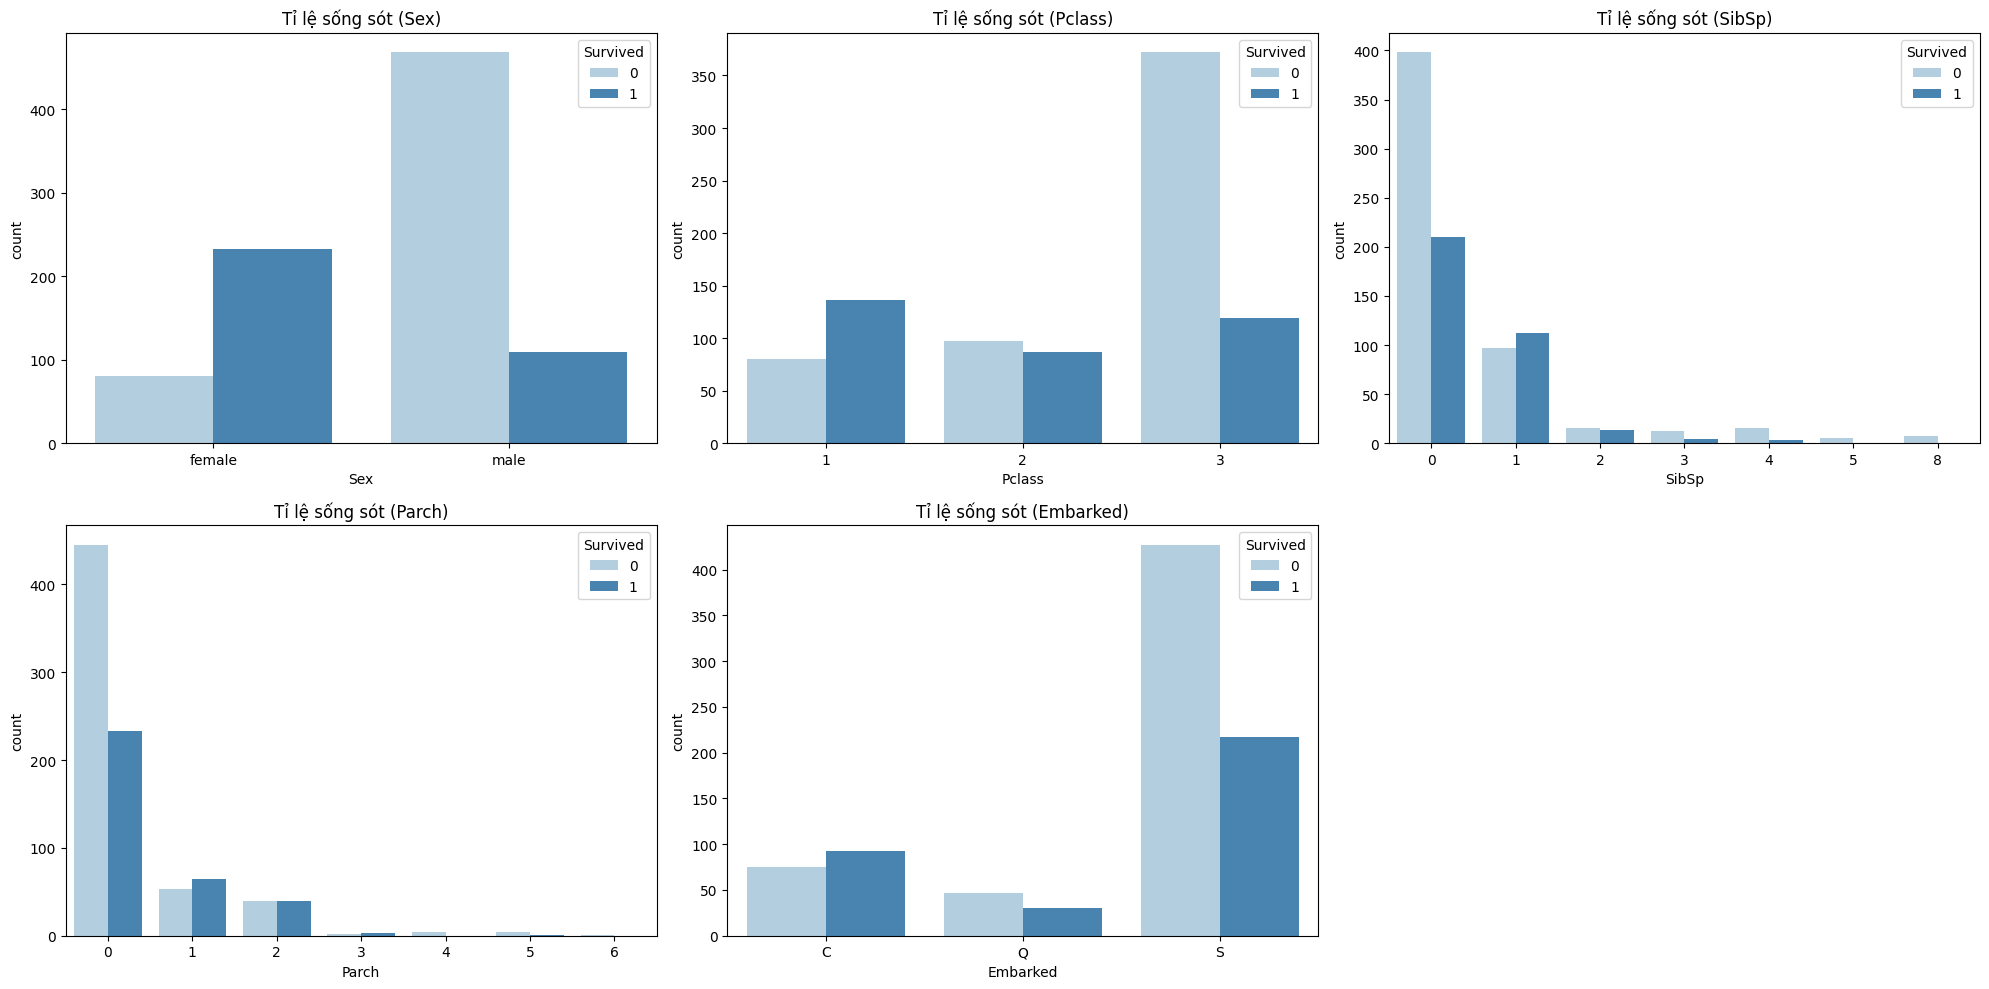

In [16]:
categories = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 10))

for r in range(n_rows):
    for c in range(n_cols):
        i = r * n_cols + c
        if i < len(categories):
            sns.countplot(x=categories[i], data=train_df, hue='Survived', palette='Blues', ax=ax[r][c])
            ax[r][c].set_title(f"Tỉ lệ sống sót ({categories[i]})")
        else:
            ax[r][c].axis('off')

plt.tight_layout()


### 2. EDA For Numerical Features

* Numerical Features: Age, Fare

<Axes: xlabel='Age', ylabel='Count'>

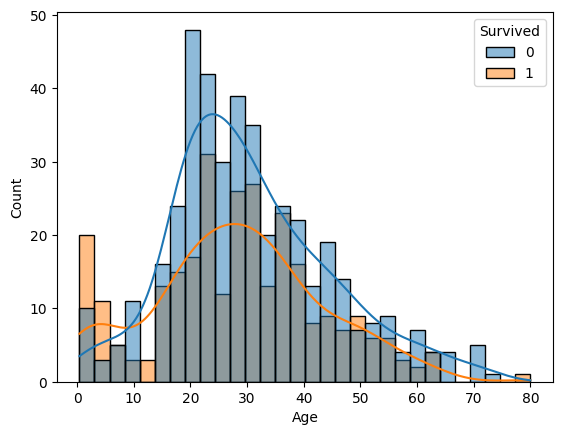

In [17]:
sns.histplot(x='Age', data=train_df, hue='Survived', kde=True, bins=30)

In [18]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

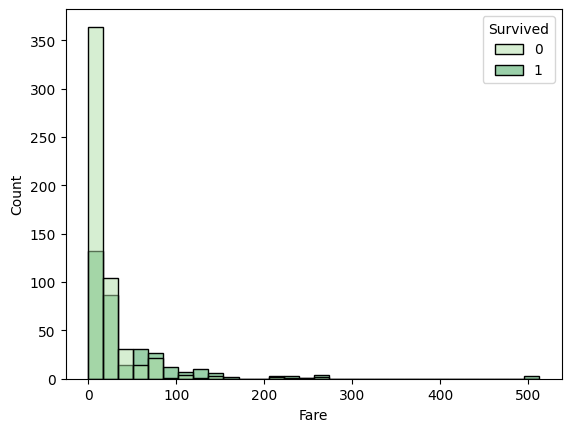

In [20]:
sns.histplot(data=train_df, x='Fare', hue='Survived', bins=30, palette='Greens')

In [24]:
pd.qcut(train_df['Fare'], 4)

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

<Axes: xlabel='Fare', ylabel='count'>

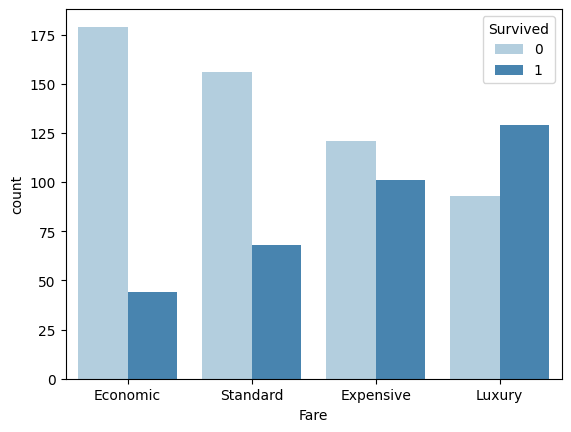

In [23]:
fare_type = ['Economic', 'Standard', 'Expensive', 'Luxury']
fare_range = pd.qcut(train_df['Fare'], 4, labels=fare_type)
sns.countplot(x=fare_range, hue=train_df['Survived'], palette='Blues')

Ta sẽ chia giá vé ra thành 4 khoảng tương đương với số lượng hành khách mua giá vé đó để thấy được sự tương quan giữa giá vé tàu và tỉ lệ sống sót (min-25%, 25%-50%, 50%-75%, 75%-max)
 * Economic (min-25%): (-0.001, 7.91]
 * Standard (25%-50%): (7.91, 14.454]
 * Expensive (50%-75%): (14.454, 31.0]
 * Luxury (75%-max): (31.0, 512.329]
 * Giá vé càng cao sẽ được ưu tiên cứu trợ nên có tỉ lệ sống sót cao hơn 